# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [381]:
import pandas as pd

def read(filepath):
    df = pd.read_csv(filepath)
    df.describe()
    return df
    
df = read('train.csv')

#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [382]:
def num_nans(df):
    return df.isna().any(axis=1).sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [383]:
def drop_na(df):
    res_cols = (df.isna().sum() <= 200)
    return df.loc[:, res_cols]

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [344]:
def to_numerical(df):
    pass


df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",None,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",None,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",None,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",None,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",None,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [384]:
#Collaborator Raul-Fikrat Azizli on piazza post
def extract_names(df): 
    name = pd.DataFrame(columns=['First Name', 'Middle Name', 'Last Name', 'Title'])
    
    name['Last Name'] = df['Name'].str.split(',').str[0]
    name['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
    name['First Name'] = df['Name'].str.split(',').str[1].str.split('.').str[1].str.split().str[0]
    name['Middle Name'] = df['Name'].str.split(',').str[1].str.split('.').str[1].str.split().str[1]

    return name


df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [385]:
def replace_with_mean(df):
    mean_age = df['Age'].mean()
    return df['Age'].fillna(mean_age)

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

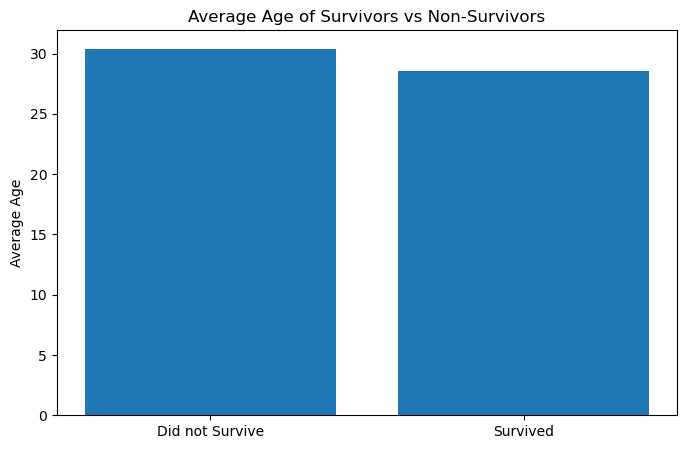

In [386]:
import matplotlib.pyplot as plt
avg_age = df.groupby('Survived')['Age'].mean()

plt.figure(figsize=(8, 5))
plt.bar(['Did not Survive', 'Survived'], avg_age)
plt.ylabel('Average Age')
plt.title('Average Age of Survivors vs Non-Survivors')
plt.show()

There is a slight correlation between age and survival, where the younger you are the more likely you survived, but it seems negligible given the slight difference.

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

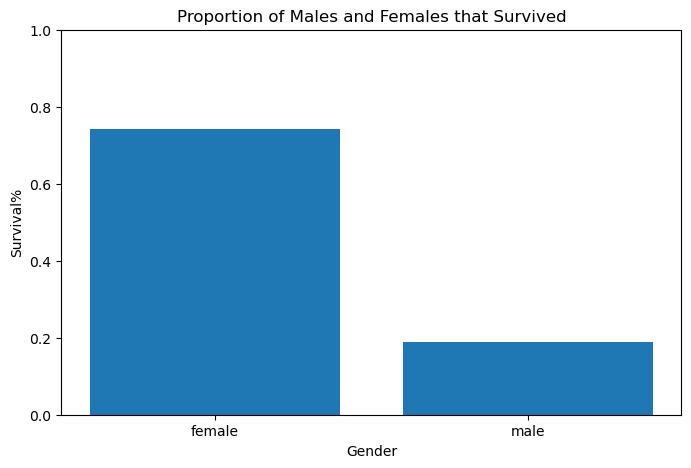

In [387]:
survival_proportion = df.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8, 5))
plt.bar(survival_proportion.index, survival_proportion)
plt.xlabel('Gender')
plt.ylabel('Survival%')
plt.title('Proportion of Males and Females that Survived')
plt.ylim(0, 1)  
plt.show()

A significantly larger proportion of females survived compared to males, so males were more likely to not survive.

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

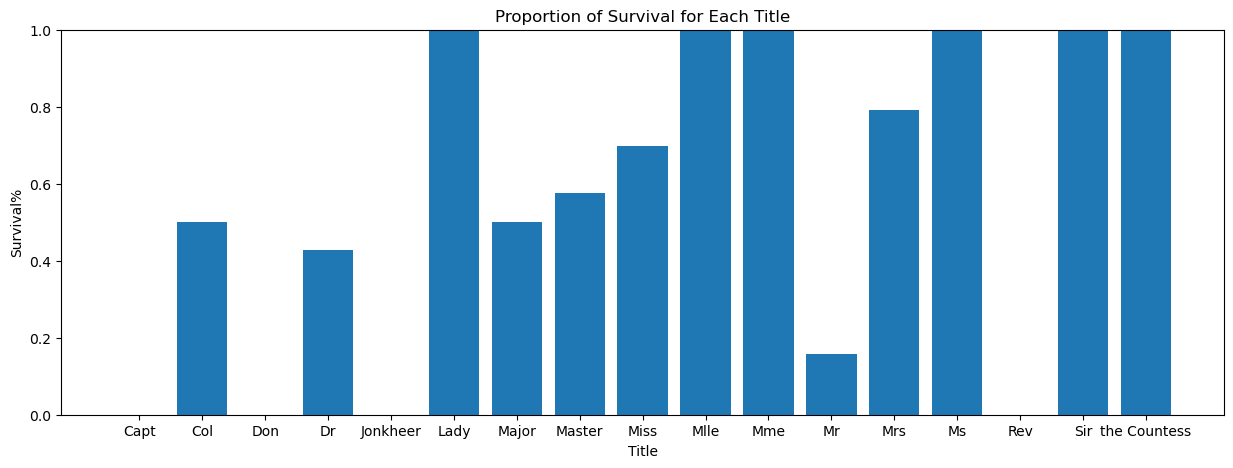

In [388]:
survival_proportion = df.groupby('Title')['Survived'].mean()

plt.figure(figsize=(15, 5))
plt.bar(survival_proportion.index, survival_proportion)
plt.xlabel('Title')
plt.ylabel('Survival%')
plt.title('Proportion of Survival for Each Title')
plt.ylim(0, 1)
plt.show()

These results emphasize the previous results as most male titles have lower survival%. Excluding Capt, Rev, Don, and Jonkheer, which im assuming had low sample sizes or positions on the boat which required serving others as they had no survivors, Mr had the lowest survival rate. 

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

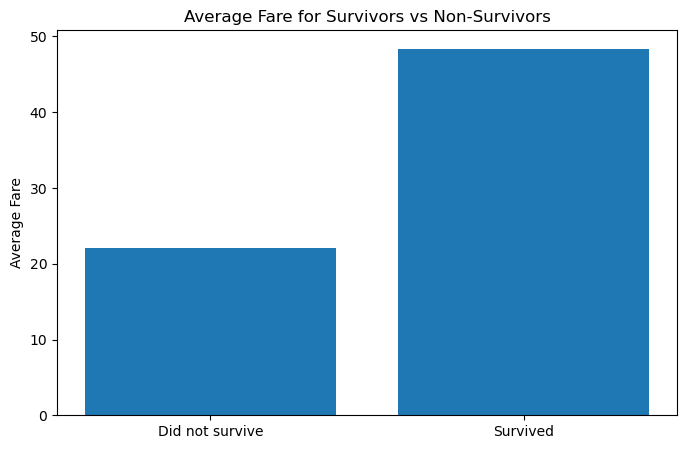

In [389]:
avg_fare = df.groupby('Survived')['Fare'].mean()

plt.figure(figsize=(8, 5))
plt.bar(['Did not survive', 'Survived'], avg_fare)
plt.ylabel('Average Fare')
plt.title('Average Fare for Survivors vs Non-Survivors')
plt.show()

It makes logical sense that those who paid higher fares were more likely to survive, as they would be considered vip passengers and would receive help first.

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

<Figure size 800x500 with 0 Axes>

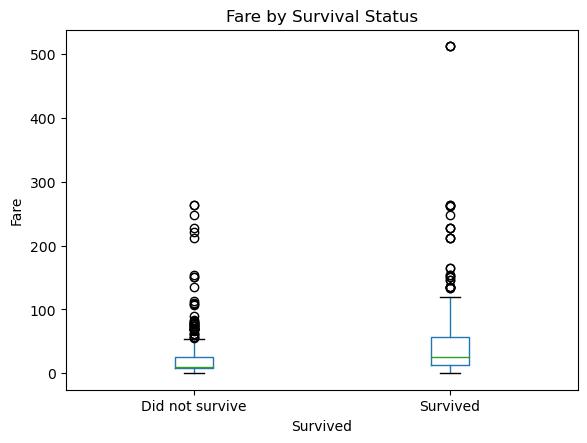

In [390]:
plt.figure(figsize=(8, 5))
df.boxplot(column='Fare', by='Survived', grid=False)
plt.xticks([1, 2], ['Did not survive', 'Survived'])
plt.ylabel('Fare')
plt.title('Fare by Survival Status')
plt.suptitle('')
plt.show()

Those with fare 100 or less all did not survive, and your chances of survival seem to increase as fare increases.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [391]:
def standardize_fare(df):
    mean_fare = df['Fare'].mean()
    std = df['Fare'].std()
    
    result = (df['Fare'] - mean_fare) / std
    
    return result

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [380]:
df = df.select_dtypes(include=['number'])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [398]:
def N_most_similar_pairs(df, N):
    pass

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: None


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

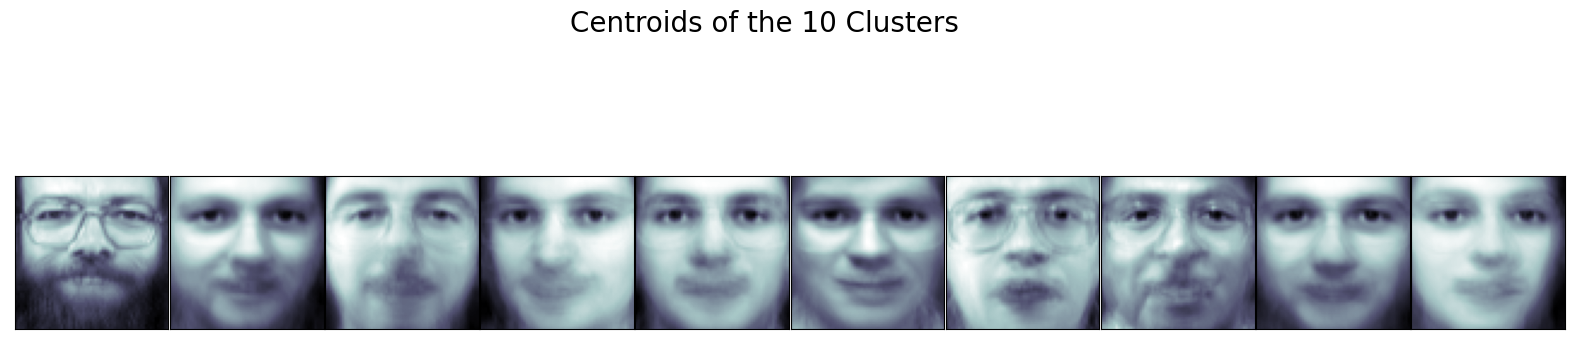

In [361]:
### !!!! I used chatGPT to help me understand the plotting for this problem, including some snippets directly from it !!!! ###\

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data


kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(faces_data)
centroids = kmeans.cluster_centers_

# chatGPT helped from here on #
fig, axes = plt.subplots(1, 10, figsize=(20, 5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(centroids[i].reshape(faces.images.shape[1:]), cmap='bone')

plt.suptitle(f'Centroids of the 10 Clusters', fontsize=20)
plt.show()


#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [362]:
from sklearn.metrics import silhouette_score

actual_labels = faces.target
kmeans_labels = kmeans.labels_

silhouette_kmeans = silhouette_score(faces_data, kmeans_labels)

silhouette_actual = silhouette_score(faces_data, actual_labels)

print(f'Silhouette Score for KMeans Clustering: {silhouette_kmeans}')
print(f'Silhouette Score for Actual Labels Clustering: {silhouette_actual}')


Silhouette Score for KMeans Clustering: 0.0913691595196724
Silhouette Score for Actual Labels Clustering: 0.1055736318230629


-> Your answer here

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

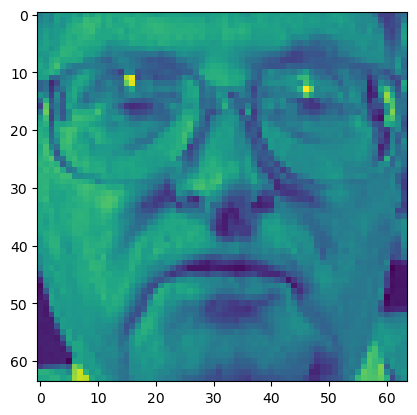

In [363]:
import numpy as np

faces = fetch_olivetti_faces(shuffle=True, random_state=42)

random_index = np.random.randint(0, faces.images.shape[0])

plt.imshow(faces.images[random_index])
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

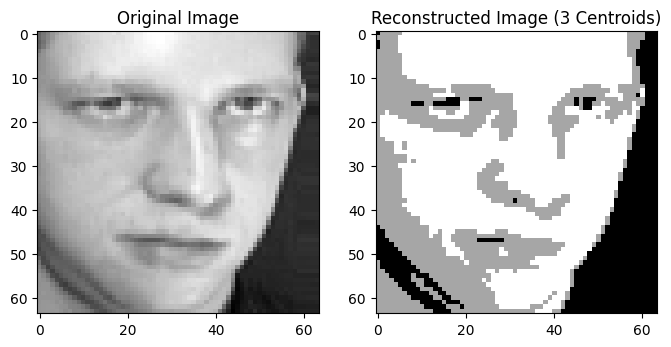

In [3]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)


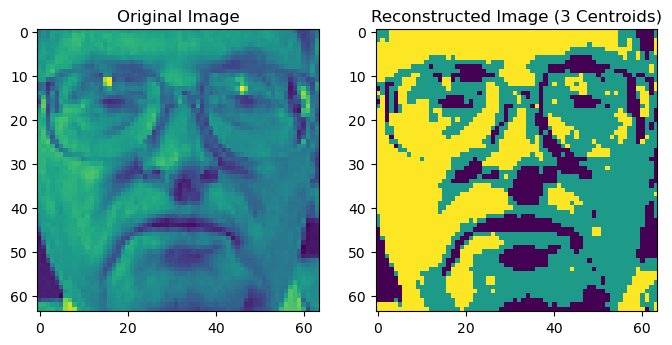

In [364]:

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
img = faces.images[random_index]

img_flatten = img.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(img_flatten)

compressed_img = kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img)
axes[0].set_title("Original Image")

axes[1].imshow(compressed_img)
axes[1].set_title("Reconstructed Image (3 Centroids)")


plt.show()


#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

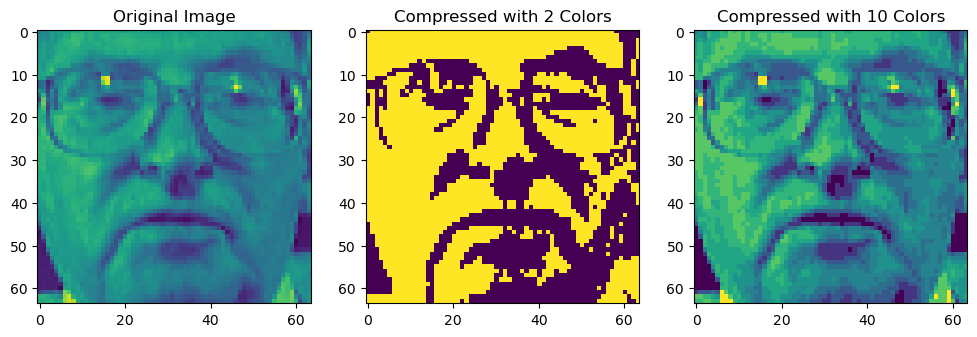

In [365]:
def reconstruct_w_colors(num_colors):
    faces = fetch_olivetti_faces(shuffle=True, random_state=42)
    img = faces.images[random_index]

    img_flatten = img.reshape(-1, 1)

    kmeans = KMeans(n_clusters=num_colors, random_state=42)
    kmeans.fit(img_flatten)

    compressed_img = kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape)
    
    return compressed_img

compressed_img_2_colors = reconstruct_w_colors(2)
compressed_img_10_colors = reconstruct_w_colors(10)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(img)
axes[0].set_title("Original Image")

axes[1].imshow(compressed_img_2_colors)
axes[1].set_title("Compressed with 2 Colors")

axes[2].imshow(compressed_img_10_colors)
axes[2].set_title("Compressed with 10 Colors")

plt.show()


## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.